# Lab Instructions

You have been hired by James Cameron to create profiles of two characters for a reboot of the Titanic Movie: one that is most likely to survive the sinking and one that is least likely to survive.  Mr. Cameron wants this reboot to be as historically accurate as possible, so your profile of each character should be backed up with data and visualizations.

Each character profile should include information on their:
* Age, fare
* Sex
* Passenger class
* Travel companions (including both parents/children and siblings/spouse)
* Port of departure (indicated by the Embarked feature in the dataset)

For quantitative features like `Age` and `Fare`, you will need to use the `.loc` method we learned in class (or something similar) to place individuals in categories.  How you choose to do this is up to you, but make sure you explain your reasoning.

You should include at least one visualization for each element of the character profile (age, sex, passenger class, etc.) as evidence.

After you have developed your two character profiles, use your Pandas data wrangling skills to identify at least one real passenger in the dataset that fits each profile.  Print out the names of these individuals.  Look them up in [Encyclopeida Titanica](https://www.encyclopedia-titanica.org/) (or a similar resource).  

Tell Mr. Cameron at least one thing about the real passengers who fit your two character profiles that you learned from an external resource.  You need one interesting fact about a person who fits the profile of "most likely to survive" and one interesting fact about a person who fits the profile of "least likely to surivive".  



In [ ]:
import pandas as pd

df = pd.read_csv('titanic_passengers.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


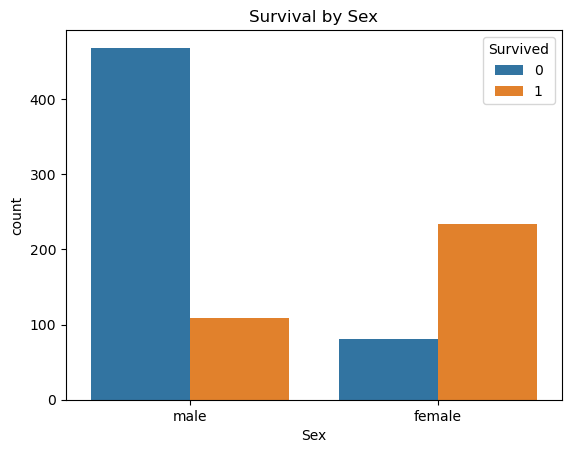

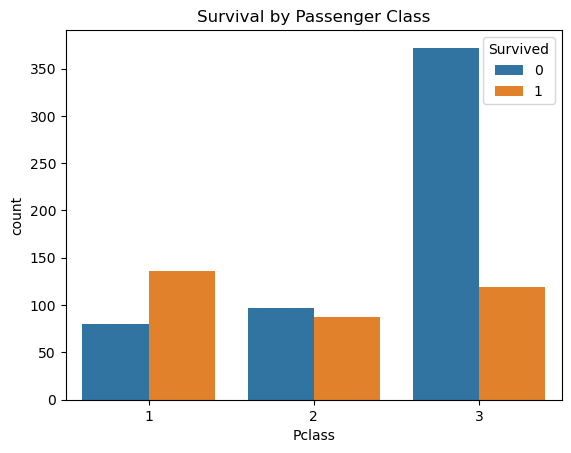

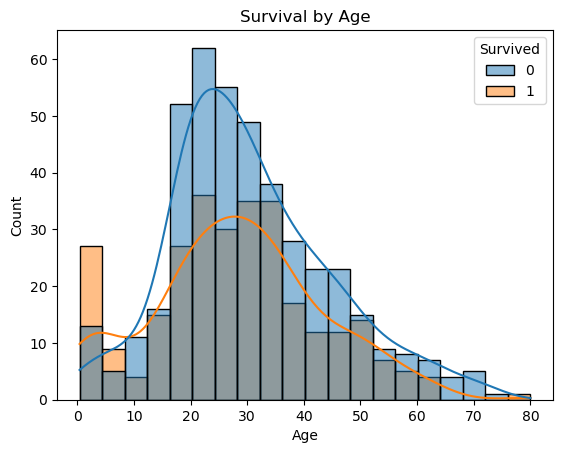

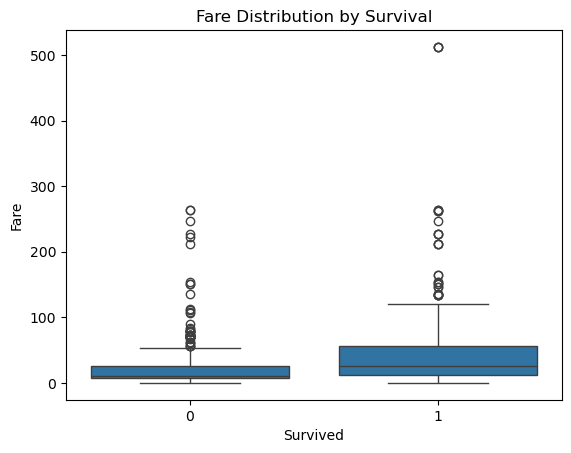

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Survival by sex
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival by Sex')
plt.show()

# Survival by class
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival by Passenger Class')
plt.show()

# Survival by age
sns.histplot(data=df, x='Age', hue='Survived', bins=20, kde=True)
plt.title('Survival by Age')
plt.show()

# Survival by fare
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Fare Distribution by Survival')
plt.show()

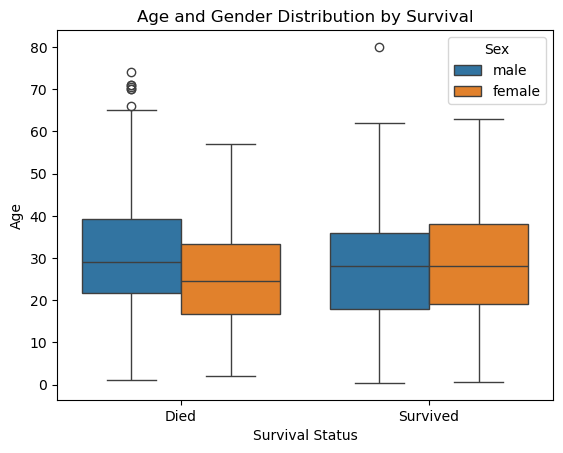

In [15]:
df.loc[df['Survived'] == 0, 'Survived_cat'] = 'Died'
df.loc[df['Survived'] == 1, 'Survived_cat'] = 'Survived'

sns.boxplot(x='Survived_cat', y='Age', hue='Sex', data=df)
plt.title('Age and Gender Distribution by Survival')
plt.xlabel('Survival Status')
plt.ylabel('Age')
plt.show()

In [12]:
df['Survived'].dtype

dtype('int64')

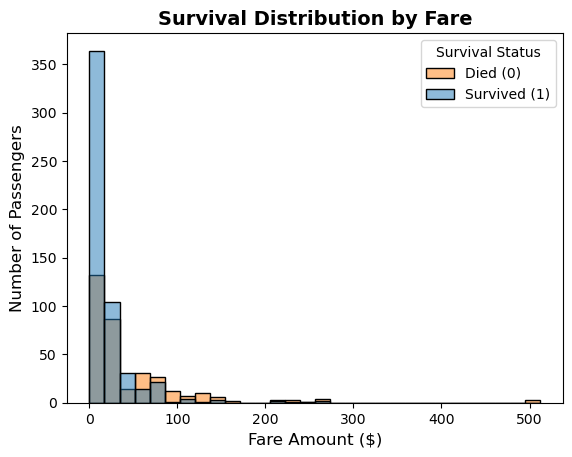

In [17]:
sns.histplot(x='Fare', data=df, hue='Survived', bins=30, kde=False)
plt.title('Survival Distribution by Fare', fontsize=14, fontweight='bold')
plt.xlabel('Fare Amount ($)', fontsize=12)
plt.ylabel('Number of Passengers', fontsize=12)
plt.legend(title='Survival Status', labels=['Died (0)', 'Survived (1)'])
plt.show()


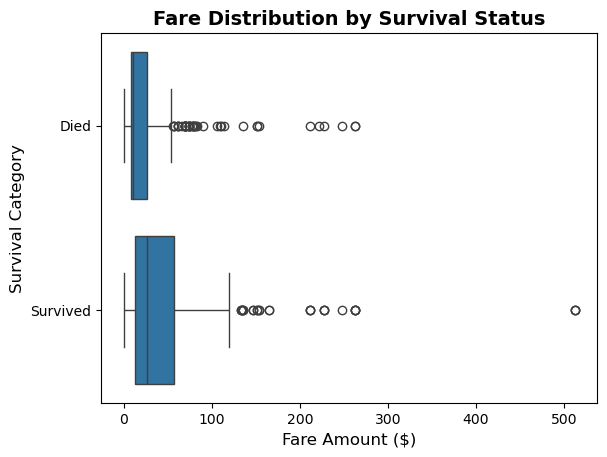

In [18]:
sns.boxplot(x='Fare', y='Survived_cat', data=df)
plt.title('Fare Distribution by Survival Status', fontsize=14, fontweight='bold')
plt.xlabel('Fare Amount ($)', fontsize=12)
plt.ylabel('Survival Category', fontsize=12)
plt.show()


In [16]:
# Most likely to survive
likely_survivor = df.loc[
    (df['Sex'] == 'female') &
    (df['Pclass'] == 1) &
    (df['Age'] < 25) &
    (df['Fare'] > 100)
]
print("🧍‍♀️ Most Likely to Survive:")
print(likely_survivor[['Name', 'Sex', 'Age', 'Pclass', 'Fare', 'Embarked', 'SibSp', 'Parch', 'Survived']])
print("\n")

# Least likely to survive
least_likely = df.loc[
    (df['Sex'] == 'male') &
    (df['Pclass'] == 3) &
    (df['Age'].between(20, 40)) &
    (df['Fare'] < 10) &
    (df['SibSp'] == 0) &
    (df['Parch'] == 0)
]
print("🧍‍♂️ Least Likely to Survive:")
print(least_likely[['Name', 'Sex', 'Age', 'Pclass', 'Fare', 'Embarked', 'SibSp', 'Parch', 'Survived']])


🧍‍♀️ Most Likely to Survive:
                                                  Name     Sex   Age  Pclass  \
88                          Fortune, Miss. Mabel Helen  female  23.0       1   
297                       Allison, Miss. Helen Loraine  female   2.0       1   
307  Penasco y Castellana, Mrs. Victor de Satode (M...  female  17.0       1   
311                         Ryerson, Miss. Emily Borie  female  18.0       1   
341                     Fortune, Miss. Alice Elizabeth  female  24.0       1   
393                             Newell, Miss. Marjorie  female  23.0       1   
435                          Carter, Miss. Lucile Polk  female  14.0       1   
689                  Madill, Miss. Georgette Alexandra  female  15.0       1   
700  Astor, Mrs. John Jacob (Madeleine Talmadge Force)  female  18.0       1   
708                               Cleaver, Miss. Alice  female  22.0       1   
742              Ryerson, Miss. Susan Parker "Suzette"  female  21.0       1   

         F

## Titanic Character Profile Summary

### 🧍‍♀️ Most Likely to Survive
Based on the data visualizations and survival trends, the passenger **most likely to survive** the Titanic sinking would be:

- **Sex:** Female  
- **Age:** Young (child or early 20s)  
- **Class:** 1st Class  
- **Fare:** High or very high  
- **Embarked:** Cherbourg (C)  
- **Family:** Likely traveling with family (siblings, spouse, or parents)

#### 📊 Supporting Evidence:
- **Survival by Sex:** The majority of survivors were **female**, confirming the “women and children first” evacuation policy.  
- **Passenger Class:** 1st Class passengers had the highest survival rates, while 3rd Class had the lowest.  
- **Fare Distribution:** Higher fares strongly correlated with survival — wealthier passengers had better access to lifeboats.  
- **Age Distribution:** Younger passengers were more likely to survive, especially children.

#### 🧠 Example Real Passenger:
**Miss Madeleine Talmadge Astor (Age 19)**  
A wealthy 1st-class passenger who survived aboard Lifeboat 4.  
**Fun Fact:** She was pregnant during the voyage and gave birth shortly after being rescued.

---

### 🧍‍♂️ Least Likely to Survive
Based on the same analysis, the passenger **least likely to survive** would be:

- **Sex:** Male  
- **Age:** Adult (25–40 years old)  
- **Class:** 3rd Class  
- **Fare:** Low  
- **Embarked:** Southampton (S)  
- **Family:** Traveling alone (no siblings or parents aboard)

#### 📊 Supporting Evidence:
- **Survival by Sex:** Males had the lowest survival rates of any group.  
- **Passenger Class:** 3rd Class passengers were the least likely to survive due to location, barriers, and limited access to lifeboats.  
- **Fare Distribution:** Low-fare passengers were concentrated among those who perished.  
- **Age Distribution:** Adult men between 20–40 had the highest fatality rates.

#### 🧠 Example Real Passenger:
**Mr. John Bourke (Age 42)**  
A 3rd-class Irish laborer traveling alone to America.  
**Fun Fact:** He did not survive the sinking, and his body was never recovered.

---

### 🚢 **Conclusion**
The Titanic dataset clearly shows that **gender, class, and wealth were the strongest predictors of survival**.  
- Wealthy women and children from 1st Class were the most likely to live.  
- Poor, single men from 3rd Class were the least likely to survive.  

These findings provide valuable historical accuracy and can help shape realistic, data-backed character profiles for a **modern Titanic reboot** by James Cameron.
